<a href="https://colab.research.google.com/github/wyiq/Supreme-Court/blob/master/Temp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [21]:
# database tool
import pandas as pd 
import numpy as np 
# for use with API to get data
#from sodapy import Socrata 
# to show graphs inline
%matplotlib inline 
# disable an unneeded warning
pd.options.mode.chained_assignment = None  # default='warn'
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math 
import seaborn as sns; sns.set_theme(color_codes=True)

plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)

In [4]:
df = pd.read_csv("/content/midterm_data.csv")

It's usually a good idea to look at some essential descriptive statistics like the mean, standard deviation, and percentiles, even if they're not required for this situation. These statistics are shown in the table below for all of the variables.

In [5]:
df.describe()

,cigs,restriction,cigprice,education,income,white,age
count,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000
mean,8.686493,0.246592,60.300411,12.470880,19304.832714,0.878563,41.237918
std,13.721516,0.431295,4.738469,3.057161,9142.958290,0.326837,17.027285
min,0.000000,0.000000,44.004000,6.000000,500.000000,0.000000,17.000000
25%,0.000000,0.000000,58.141500,10.000000,12500.000000,1.000000,28.000000
50%,0.000000,0.000000,61.053000,12.000000,20000.000000,1.000000,38.000000
75%,20.000000,0.000000,63.179000,13.500000,30000.000000,1.000000,54.000000
max,80.000000,1.000000,70.129000,18.000000,30000.000000,1.000000,88.000000


It is apparent from this summary statistics table that the median average number of cigarettes smoked per day is zero. The median people in the dataset has 12 years of education---that is, up to high school. In contrast, the 75-percentile is at 13.5 years of education---that is, up to a college education. The median income is at 30000. About 87% of adults in the sample are white. 

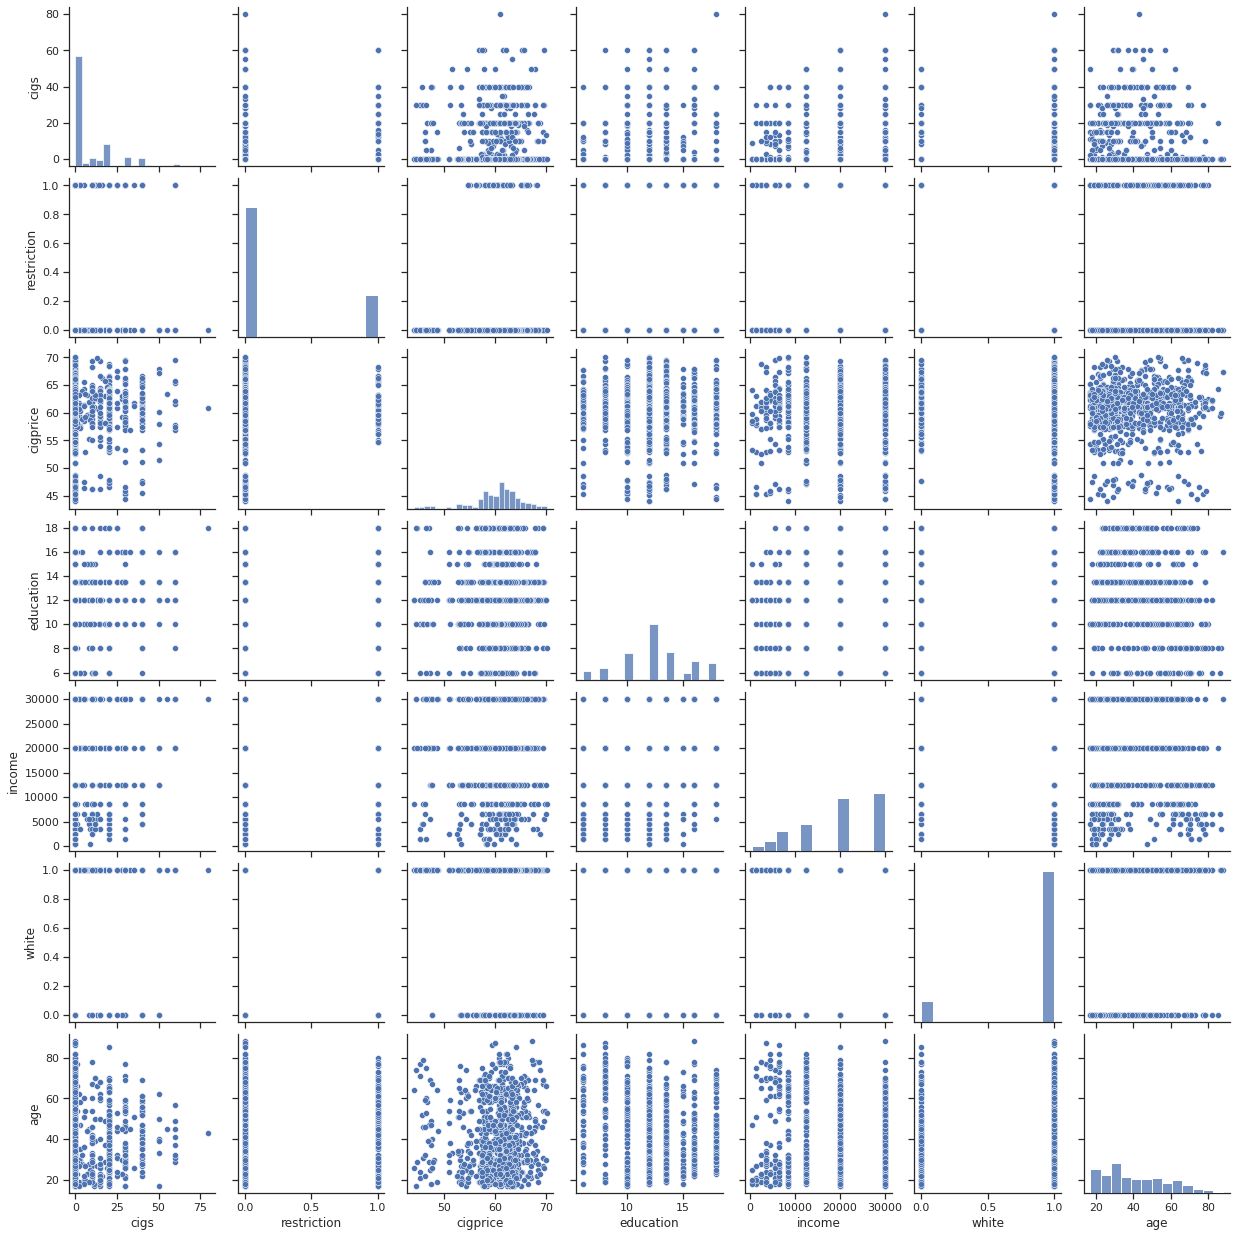

In [ ]:
sns.set_theme(style="ticks")

sns.pairplot(df)

Note: This figure is a matrix of scatter plots among variables of the average number of cigarettes smoked per day, restriction on smoking in restaurants, average cigarette price, education, income, race, and age. The plots on the diagonal positions show the histograms of the seven variables. The plots off of the diagonal positions show the scatter plots between two variables. For example, The plot on the seventh row in the first column shows the scatter plot between age and average number of cigarettes smoked per day.

Judging from the scatter plots on the first row, when we are comparing only twovariables at a time, we see that age have roughly positive relationship with average number of cigarettes smoked per day. In contrast, average cigarette price does not have a clear positive relationship with average number of cigarettes smoked per day. It seems that education especially has a clear negative relationship with average number of cigarettes smoked per day. However, we cannot conclude just from these plots that education has the largest impact on cigarettes smoked per day, because they only show the relationships between two variables at a time. To accountfor all variables jointly, we need to look at the multiple regression results.

In [7]:
#Data Transformation 
df["log_cigprice"] =  np.log2(df["cigprice"])

In [8]:
df["log_income"] =  np.log2(df["income"])

In [9]:
df["age_square"] = df["age"] **2

In [ ]:
df.sample(10)

,cigs,restriction,cigprice,education,income,white,age,log_income,log_cigprice,age_square
478,0,0,62.104,13.5,20000,1,32,14.287712,5.956614,1024
26,0,1,61.399,18.0,30000,1,38,14.872675,5.940143,1444
781,0,0,63.999,10.0,12500,1,68,13.609640,5.999977,4624
146,20,0,54.648,13.5,12500,0,34,13.609640,5.772097,1156
336,10,0,58.795,12.0,30000,1,33,14.872675,5.877622,1089
40,25,1,60.862,18.0,30000,1,32,14.872675,5.927470,1024
679,50,0,51.443,12.0,12500,1,33,13.609640,5.684903,1089
572,0,0,57.030,13.5,2500,1,19,11.287712,5.833649,361
271,20,0,58.080,10.0,30000,1,52,14.872675,5.859970,2704
751,10,0,46.310,12.0,30000,1,46,14.872675,5.533252,2116


Based on the regression report below, the estimated coefficient on restriction is -2.7721. This estimate is economically significant because if one's state puts a restriction on smoking in restaurants is associated with a -2.7721 decrease in the average number of cigarettes smoked per day -- a nontrivial decrease. The estimate is also highly statistically significant, different from zero under the 5% significance level. However, because this regression does not account for other relevant factors such as education and cigarette price, we cannot interpret this coefficient to represent the causal effect of restriction on cigarette consumption.

In [ ]:
f_rev = "cigs ~ restriction "

#Fit the OLS model
est = smf.ols(formula=f_rev, data = df).fit()
#Show OLS Regression Results
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cigs   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     6.158
Date:                Tue, 29 Jun 2021   Prob (F-statistic):             0.0133
Time:                        08:21:14   Log-Likelihood:                -3255.0
No. Observations:                 807   AIC:                             6514.
Df Residuals:                     805   BIC:                             6523.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       9.3701      0.555     16.892      0.000       8.281      10.459
restriction    -2.7721      1.117     -2.482      0.013      -4.965      -0.579
==============================================================================
Omnibus:                      241.628   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              549.614
Skew:                           1.634   Prob(JB):                    4.50e-120
Kurtosis:                       5.381   Cond. No.                         2.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The plot below indicates a similar idea:  if one's state puts a restriction on smoking in restaurants is associated with a -2.7721 decrease in the average number of cigarettes smoked per day. 

[(-0.2, 1.2)]

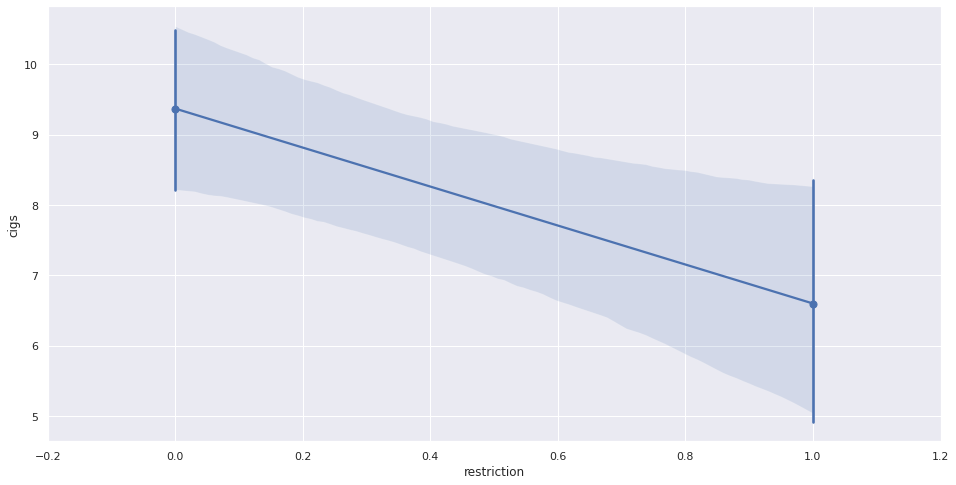

In [24]:
ax = sns.regplot(x="restriction", y="cigs", data=df, x_estimator=np.mean)
ax.set(xlim=(-0.2, 1.2))

The regression table below shows the result of regressing the average number of cigarettes smoked per day on restriction and log cigarette price. The estimated coefficient on restriction is -2.7639, meaning that if one's state puts a restriction on smoking in restaurants is associated with a -2.7639 decrease in the average number of cigarettes smoked per day. The estimated coefficient of log cigarette price is -0.1981, implying that an additional 10 dollars in cigarette price are associated with a 1.981 decrease in the average number of cigarettes smoked per day. However, this coefficient is not statistically different from zero under the 5% significance level.

In [ ]:
f_rev = "cigs ~ restriction + log_cigprice "

#Fit the OLS model
est = smf.ols(formula=f_rev, data = df).fit()
#Show OLS Regression Results
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cigs   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     3.077
Date:                Tue, 29 Jun 2021   Prob (F-statistic):             0.0467
Time:                        08:23:53   Log-Likelihood:                -3255.0
No. Observations:                 807   AIC:                             6516.
Df Residuals:                     804   BIC:                             6530.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       10.5384     24.045      0.438      0.661     -36.660      57.737
restriction     -2.7639      1.130     -2.445      0.015      -4.983      -0.545
log_cigprice    -0.1981      4.075     -0.049      0.961      -8.197       7.801
==============================================================================
Omnibus:                      241.692   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              549.944
Skew:                           1.634   Prob(JB):                    3.81e-120
Kurtosis:                       5.382   Cond. No.                         304.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
f_rev = "cigs ~ restriction + log_cigprice + education + log_income"

#Fit the OLS model
est = smf.ols(formula=f_rev, data = df).fit()
#Show OLS Regression Results
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cigs   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.563
Date:                Wed, 30 Jun 2021   Prob (F-statistic):             0.0536
Time:                        09:30:43   Log-Likelihood:                -3254.2
No. Observations:                 807   AIC:                             6516.
Df Residuals:                     803   BIC:                             6535.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       12.2235     24.076      0.508      0.612     -35.035      59.482
restriction     -2.6852      1.132     -2.373      0.018      -4.907      -0.464
log_cigprice    -0.0738      4.075     -0.018      0.986      -8.072       7.925
education       -0.1955      0.158     -1.238      0.216      -0.506       0.115
==============================================================================
Omnibus:                      245.800   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              571.483
Skew:                           1.648   Prob(JB):                    8.02e-125
Kurtosis:                       5.475   Cond. No.                         715.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
f_rev = "cigs ~ restriction + log_cigprice + education   + age "

#Fit the OLS model
est = smf.ols(formula=f_rev, data = df).fit()
#Show OLS Regression Results
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cigs   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.509
Date:                Tue, 29 Jun 2021   Prob (F-statistic):             0.0407
Time:                        08:23:56   Log-Likelihood:                -3253.1
No. Observations:                 807   AIC:                             6516.
Df Residuals:                     802   BIC:                             6540.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.3400     24.067      0.554      0.580     -33.901      60.581
restriction     -2.7426      1.131     -2.424      0.016      -4.963      -0.522
log_cigprice     0.1393      4.074      0.034      0.973      -7.857       8.136
education       -0.2395      0.160     -1.493      0.136      -0.554       0.075
age             -0.0440      0.029     -1.528      0.127      -0.100       0.013
==============================================================================
Omnibus:                      248.312   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              584.480
Skew:                           1.658   Prob(JB):                    1.21e-127
Kurtosis:                       5.527   Cond. No.                     2.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The estimated return to education hardly changes under the table below when we include the full set of additional control variables. It is estimated that if one's state puts a restriction on smoking in restaurants, decreases in the average number of cigarettes smoked by -2.8656 per day, statistically different from zero at 5% significance level. Because this estimate remains stable even as we add control variables, we can reasonably believe that this estimate represents the causal effect of restriction on cigarette consumption. 

In [ ]:
f_rev = "cigs ~ restriction + log_cigprice + education + log_income + white + age + age_square"

#Fit the OLS model
est = smf.ols(formula=f_rev, data = df).fit()
#Show OLS Regression Results
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cigs   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     6.377
Date:                Tue, 29 Jun 2021   Prob (F-statistic):           2.59e-07
Time:                        08:23:57   Log-Likelihood:                -3236.2
No. Observations:                 807   AIC:                             6488.
Df Residuals:                     799   BIC:                             6526.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -2.6824     24.221     -0.111      0.912     -50.226      44.861
restriction     -2.8656      1.117     -2.565      0.011      -5.059      -0.672
log_cigprice    -0.5898      4.008     -0.147      0.883      -8.457       7.278
education       -0.5018      0.167     -3.001      0.003      -0.830      -0.174
log_income       0.6024      0.505      1.192      0.233      -0.389       1.594
white           -0.5592      1.459     -0.383      0.702      -3.424       2.306
age              0.7745      0.161      4.825      0.000       0.459       1.090
age_square      -0.0091      0.002     -5.188      0.000      -0.012      -0.006
==============================================================================
Omnibus:                      225.674   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              496.001
Skew:                           1.537   Prob(JB):                    1.97e-108
Kurtosis:                       5.302   Cond. No.                     1.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Overall, we identified a number of variables that are both economically and statistically significant. Therefore, when we are thinking about the effects of placing smoking restrictions in the restaurant on people's smoking, we are sufficient reasons to argue that the cigarette consumption will drop down when the state puts a limitation on smoking in restaurants. 

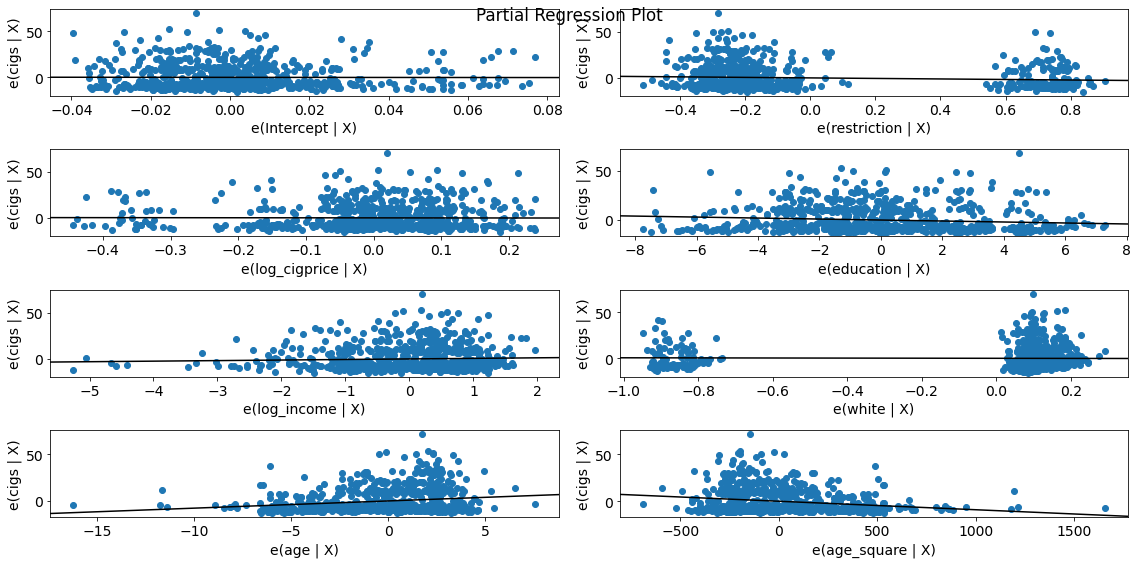

In [ ]:
fig = sm.graphics.plot_partregress_grid(est)
fig.tight_layout(pad=1.0)